In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from scipy import stats

rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

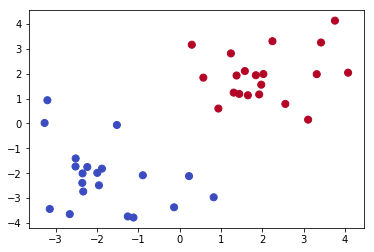

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

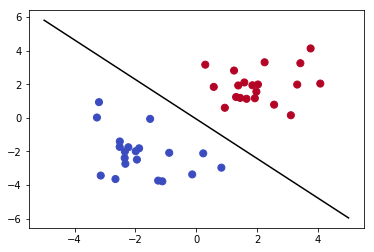

The hyperplane is a line with slope: -1.17689316087, intercept: -0.0766504186458


In [3]:
from sklearn import svm
clf = svm.SVC(C= 100000, kernel = 'linear', random_state = 0)
clf.fit(X,Y)
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')
plt.show()
print('The hyperplane is a line with slope: ' + str(a) + ', intercept: ' + str(-(clf.intercept_[0]) / w[1]))

#### b. List the support vectors.

In [4]:
clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

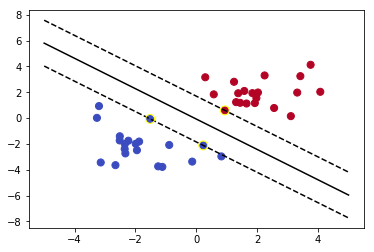

In [5]:
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
           facecolors='none', zorder=10, edgecolors='yellow')
plt.show()

#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

In [6]:
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# as indicated in the plot above

#### d. Compute the width of the margin.

In [7]:
margin*2

2.2977993504276437

#### e. What would you expect to happen to the margin if the constant C was made very small?

the margin will be smaller because smaller C means less penalty, hence resulting smaller margins

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

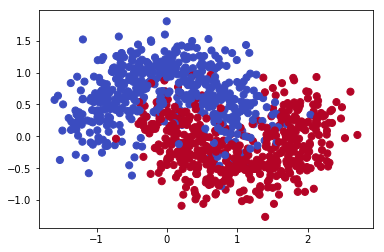

In [8]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [9]:
clf = svm.SVC(kernel = 'poly', random_state = 0)
clf.fit(X_train,Y_train)
IS_accuracy = clf.score(X_train, Y_train)
OS_accuracy = clf.score(X_test, Y_test)

print('in sample accuracy: ' + str(IS_accuracy))
print('Out of sample accuracy: ' + str(OS_accuracy))

in sample accuracy: 0.813432835821
Out of sample accuracy: 0.827272727273


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


In [10]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

def optimal_polynomial(degree):
    validation_accuracy = []
    for i in np.linspace(-10,2*degree,200): 
        clf = svm.SVC(kernel = 'poly', degree = degree, C = math.exp(i), random_state = 0)
        clf.fit(X_train,Y_train)
        validation_accuracy.append(clf.score(X_vali, Y_vali))
    plt.plot(np.linspace(-10,2*degree,200), validation_accuracy, '-')
    plt.title('degree: ' + str(degree))
    plt.xlabel('log(C)')
    plt.ylabel('validation accruacy')
    plt.show()

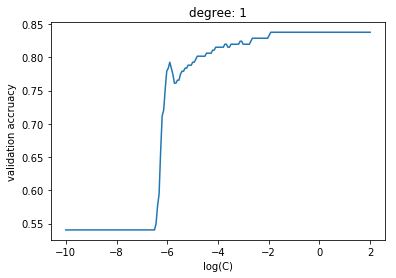

In [11]:
optimal_polynomial(1)

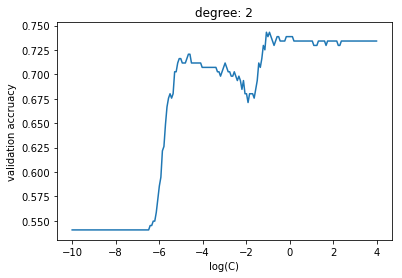

In [12]:
optimal_polynomial(2)

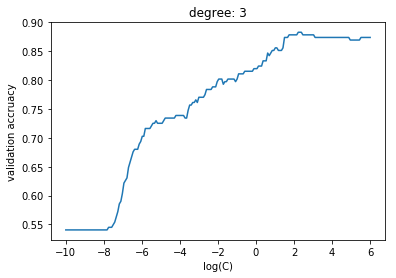

In [13]:
optimal_polynomial(3)

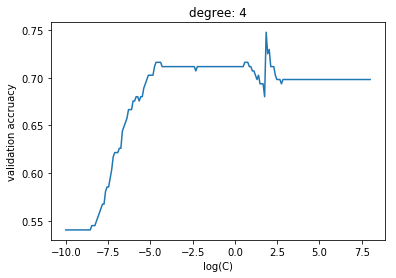

In [14]:
optimal_polynomial(4)

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [15]:
clf = svm.SVC(kernel = 'poly', degree = 3, C = 3, random_state = 0)
clf.fit(X_train,Y_train)
IS_accuracy = clf.score(X_train, Y_train)
OS_accuracy = clf.score(X_test, Y_test)

print('in sample accuracy: ' + str(IS_accuracy))
print('Out of sample accuracy: ' + str(OS_accuracy))

in sample accuracy: 0.835820895522
Out of sample accuracy: 0.848484848485


From observation above plots, we can see that the validation accuracy is at highest when the polynomial is of degree 3 and when the regularization constant is around 3

## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) = $\frac{3}{5}$

P(No) = $\frac{2}{5}$

P(Red|Yes) = $\frac{5}{6} $

P(SUV|Yes) = $\frac{1}{3}$

P(Domestic|Yes) = $\frac{1}{2}$

P(Red|No) = $\frac{1}{4}$

P(SUV|No) = $\frac{3}{4}$

P(Domestic|No) = $\frac{1}{2}$

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen?
$P(red,domestic,SUV | yes) = \frac{5}{6} * \frac{1}{3} * \frac{1}{2} = \frac{5}{36}$

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [16]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [17]:
def trainGaussianNaiveBayes(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_mu1'] = X_1[j].mean()
        nbc[j+'_sigma1'] = X_1[j].std()
        nbc[j+'_mu0'] = X_0[j].mean()
        nbc[j+'_sigma0'] = X_0[j].std()
    return nbc

def testGaussianNaiveBayes(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            pdf1 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu1'],scale=nbc[j+'_sigma1'])
            pdf0 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu0'],scale=nbc[j+'_sigma0'])
            y_pred[i] = y_pred[i]*pdf1/pdf0 if pdf0 > 0 else 1E10
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [18]:
naive_bayes_classifier = trainGaussianNaiveBayes(X_train,y_train)
for i,j in naive_bayes_classifier.items():
    print(i)
    print(j)
    print()
y_pred_train = testGaussianNaiveBayes(X_train,naive_bayes_classifier)
y_pred_test = testGaussianNaiveBayes(X_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print( 'In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print( 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

prior
0.300847457627

t_pre_mu1
4.070422535211268

t_pre_sigma1
3.518619630569318

t_pre_mu0
2.690909090909091

t_pre_sigma0
2.610060698804001

glu_mu1
144.14084507042253

glu_sigma1
30.626457177996503

glu_mu0
111.46666666666667

glu_sigma0
24.69188998222512

blood_p_mu1
74.56338028169014

blood_p_sigma1
13.799308879553351

blood_p_mu0
69.2060606060606

blood_p_sigma0
11.713290850878767

triceps_mu1
33.478873239436616

triceps_sigma1
9.762697453543078

triceps_mu0
27.2

triceps_sigma0
10.436918524769798

serum_mu1
209.2112676056338

serum_sigma1
126.92100079441515

serum_mu0
127.0060606060606

serum_sigma0
91.48613762575857

b_m_mu1
35.22394366197182

b_m_sigma1
6.258490570844708

b_m_mu0
31.709090909090893

b_m_sigma0
6.337613405747429

pedigree_f_mu1
0.6390422535211271

pedigree_f_sigma1
0.4390420232610254

pedigree_f_mu0
0.46868484848484815

pedigree_f_sigma0
0.29175032773322873

age_mu1
35.7887323943662

age_sigma1
10.263549223145745

age_mu0
28.393939393939394

age_sigma0
8.53736

### b) What is the prior probability of diabetes, learned from the training data?

from above, the prior is 0.300847457627

### c) What is the mean and variance of each input variable for patients with diabetes?

refer above printed results, see XX_mu1 and XX_sigma1

### d) What is the mean and variance of each input variable for patients without diabetes?

refer above printed results, see XX_mu0 and XX_sigma0

## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [19]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print (X_Labeled_train)
print (y_Labeled_train)

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [20]:
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [21]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)

for i,j in naive_bayes_classifier.items():
    print( i)
    print( j)
    print()
    
y_pred_train = testNaiveBayesDiscrete(X_Labeled_train,naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print( 'In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train))
print( 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

prior
0.444444444444

0_1
1    0.50
5    0.25
2    0.25
Name: 0, dtype: float64

0_0
6    0.4
4    0.2
3    0.2
2    0.2
Name: 0, dtype: float64

1_1
2    0.50
3    0.25
1    0.25
Name: 1, dtype: float64

1_0
6    0.6
4    0.2
1    0.2
Name: 1, dtype: float64

2_1
2    0.50
6    0.25
1    0.25
Name: 2, dtype: float64

2_0
6    0.6
4    0.2
2    0.2
Name: 2, dtype: float64

In sample prediction accuracy: 1.0
Out of sample prediction accuracy: 0.694444444444


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [22]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print( 'Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = (testNaiveBayesDiscrete(X_Unlabeled,nbc)>0.5).astype(int)
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]).reset_index().drop(['index'], axis = 1)
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled]).reset_index().drop(['index'], axis = 1)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [23]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train, X_Unlabeled_train,num_iters=50)
for i,j in naive_bayes_classifier.items():
    print( i)
    print( j)
    print()
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print( 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
prior
0    0.464912
dtype: float64

0_1
{4: 0    0.09434
Na